# Problem Statement:


Predicting whether income exceeds $50K/yr based on census data

# Buisness objective:

A financial services company is looking to improve customer segmentation and targeted marketing strategies for its new premium credit card product.

They want to predict whether a person earns more than $50,000 per year, based on their demographic and employment-related attributes (like age, education, occupation, hours worked per week, etc.).

# Project Objective:


• The objective of this project is to perform exploratory data analysis (EDA) and build predictive models using the Adult Census Income dataset to:

1. Understand the key factors that influence whether an individual earns more than $50,000 per year.

2. Apply Linear Regression to explore and model relationships between continuous variables such as hours worked per week.

3. Apply Logistic Regression to predict whether an individual earns >50K or ≤50K, based on features like age, education, occupation, work hours, etc.

• The ultimate goal is to gain insights from the data and build simple machine learning models to support data-driven decision-making, such as targeted marketing or socioeconomic analysis.

## Importing necessary libraries

In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Loading the dataset

In [45]:
df=pd.read_csv('adult.csv')

# 1- Basic Exploration of data
* 1.1 Checking how the data looks 
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

## 1.1 Checking the data

In [50]:
df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
28640,22,Private,200318,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,15,United-States,<=50K
19730,38,Private,66686,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
3622,73,Federal-gov,127858,Some-college,10,Widowed,Tech-support,Not-in-family,White,Female,3273,0,40,United-States,<=50K
11327,35,Self-emp-not-inc,191503,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
2646,39,Private,198841,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,45,United-States,>50K
16994,55,Private,144071,11th,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
30878,36,Private,150548,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,30,United-States,<=50K
13073,29,Private,29865,HS-grad,9,Divorced,Sales,Not-in-family,Amer-Indian-Eskimo,Female,0,0,50,United-States,<=50K
10400,57,?,208311,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,80,United-States,>50K
22218,51,Federal-gov,217647,Some-college,10,Divorced,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,<=50K


OBSERVATION
1. Here we can see that workclass column containes inappropriate values(?) , need to be corrected.
2. occupation column also contain inappropriate value 

## 1.2 Checking the shape of dataset 

In [51]:
 df.shape

(32561, 15)

## 1.3 Checking info 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 1.4 Checking statictical summary 

In [53]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


OBSERVATION
1. Capital gain is more than capital loss.
2. we dont have to focus on fnlwgt column.


## 2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise)
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

## 2.1 Checking duplicate rows 

In [54]:
# checking and dropping duplicate values 
# df.duplicated().sum()
df[df.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


OBSERVATION

Here we can see a lot of duplicate values 
now removing the duplicates values from the dataset

In [6]:
df.drop_duplicates(inplace=True)

## 2.2 Checking Null Values (columnwise)

In [7]:
# checking null values 
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

OBSERVATION 

Here we can see that we don't have null values , but do have inappropriate values

In [55]:
# replcaing the value with null value
df.replace('?', pd.NA, inplace=True)

In [56]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

OBSERVATION

Here we can see that we do have some missing values which is under the limit of 5% , so we can fill/impute the missing values 

In [57]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)


age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


In [58]:
# filling / imputing null values with mode 
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)
df['native.country'].fillna(df['native.country'].mode()[0],inplace=True)

In [59]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64


## 2.3 Outliers Analysis
visualising outliers 

<Axes: xlabel='income', ylabel='age'>

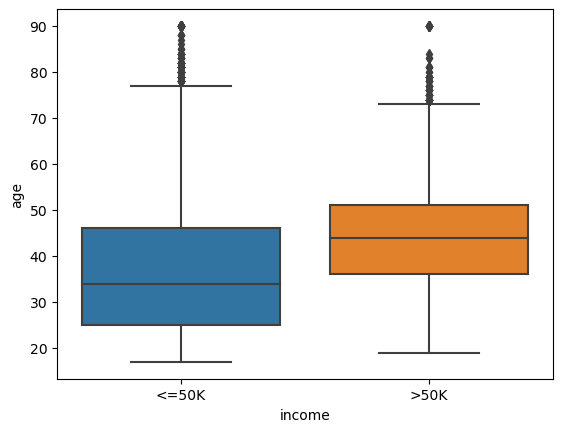

In [60]:
sns.boxplot(data=df,x='income',y='age')

OBSERVATION

1.People earning >50K tend to be older on average than those earning <=50K

2.The median age (shown by the line in the box) is higher for the >50K group

3.Both income groups show similar spread/variability in ages (similar box widths)

4.The >50K group has slightly more outliers at the higher age range


In [61]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

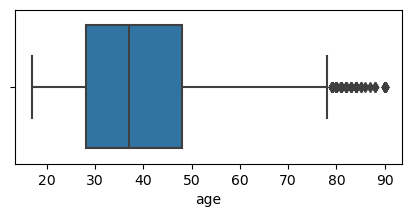

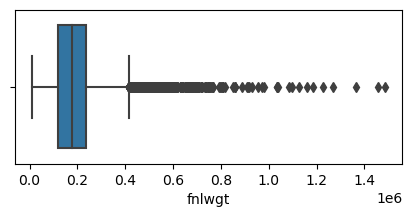

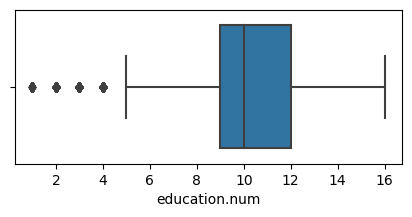

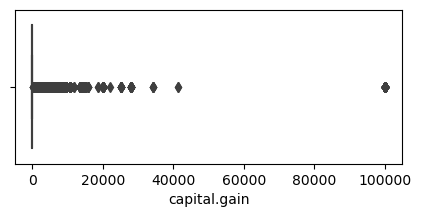

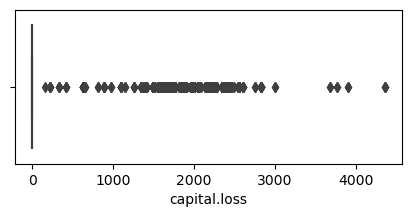

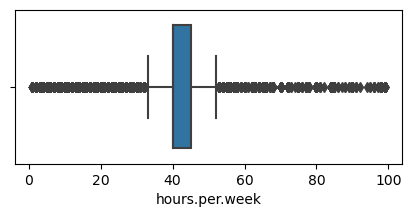

In [62]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)

In [63]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  age : 143
-----------------------
Number of ouliers in  fnlwgt : 992
-----------------------
Number of ouliers in  education.num : 0
-----------------------
Number of ouliers in  capital.gain : 2712
-----------------------
Number of ouliers in  capital.loss : 1519
-----------------------
Number of ouliers in  hours.per.week : 3492
-----------------------


OBSERVATION

1. hours.per.week has the highest number of outliers.
2. The high number of outliers in hours.per.week suggests extreme work hours (either very high and very low both)


## 2.4 Univariate Analysis

In [64]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [65]:
df['native.country'].value_counts()

native.country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

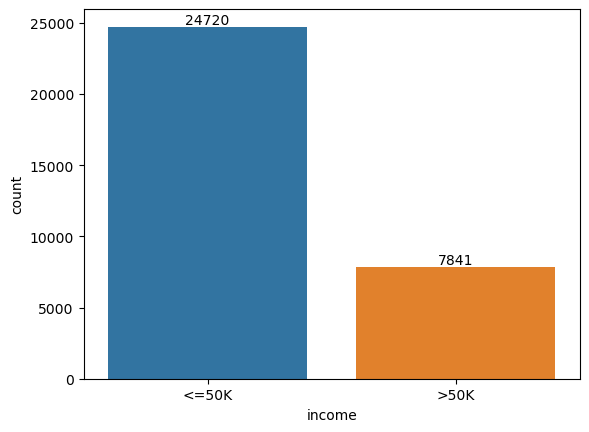

In [66]:
ax=sns.countplot(data=df,x='income')
for bars in ax.containers:
    ax.bar_label(bars)

OBSERVATION:

Most of the people earn less than 50K/year (i.e 24720)

<Axes: xlabel='hours.per.week', ylabel='Count'>

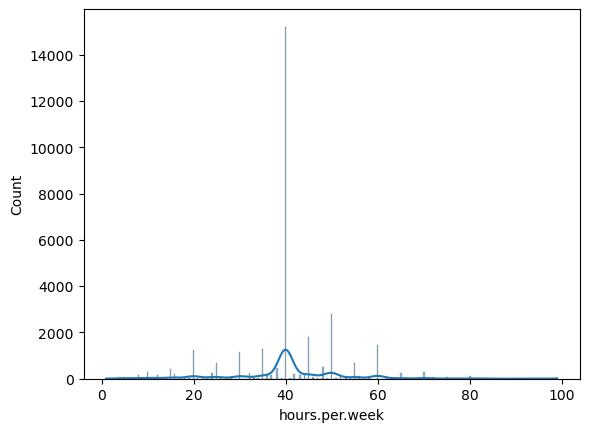

In [17]:
sns.histplot(data=df,x='hours.per.week',kde=True)

OBSERVATION:

1. The data shows a strong peak at 40 hours per week, which is the standard full-time work week

2. Another small peak appears around 50-60 hours, indicating overtime workers

3. There's a smaller but noticeable peak at 20 hours, likely representing part-time workers

4. The KDE curve shows the distribution is right-skewed with a long tail of individuals working more than 40 hours

## 2.5 Bivariate analysis

Since during model building we will be having "Price" and "Make" as our target variables so we will only do bi-variate analysis of these features only.

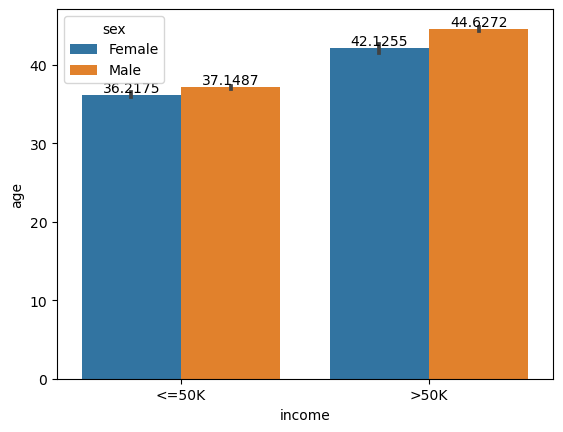

In [18]:
ax=sns.barplot(data=df,x='income',y='age',hue='sex')
for bars in ax.containers:
    ax.bar_label(bars)

OBSERVATION:
    
We can see that people who are earning more than 50K/year are all male 

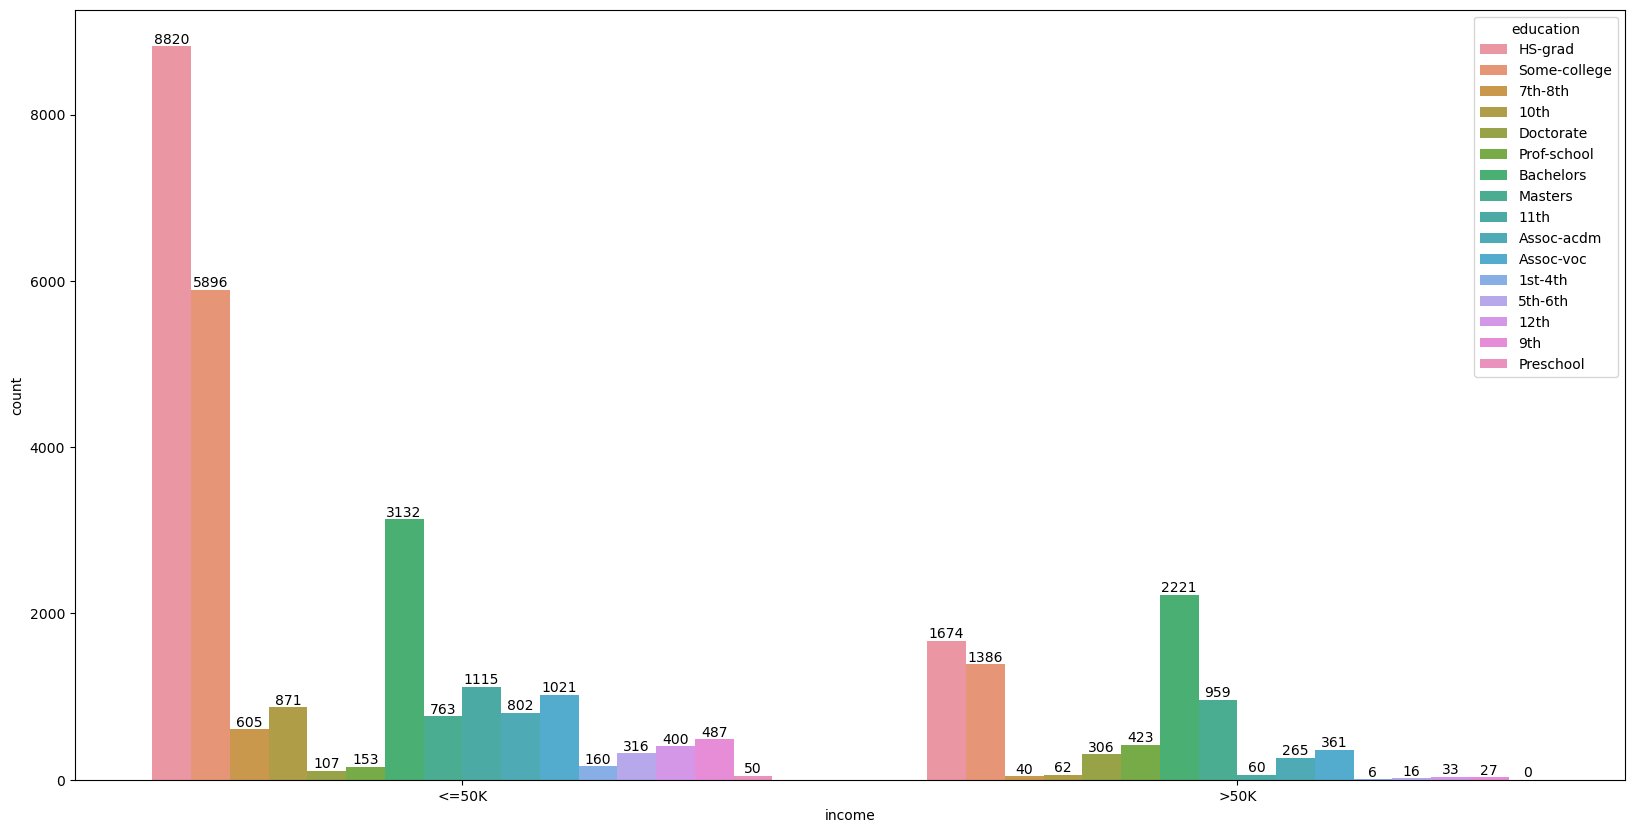

In [19]:
plt.figure(figsize=(20,10))
ax=sns.countplot(data=df,x='income',hue='education')
for bars in ax.containers:
    ax.bar_label(bars)

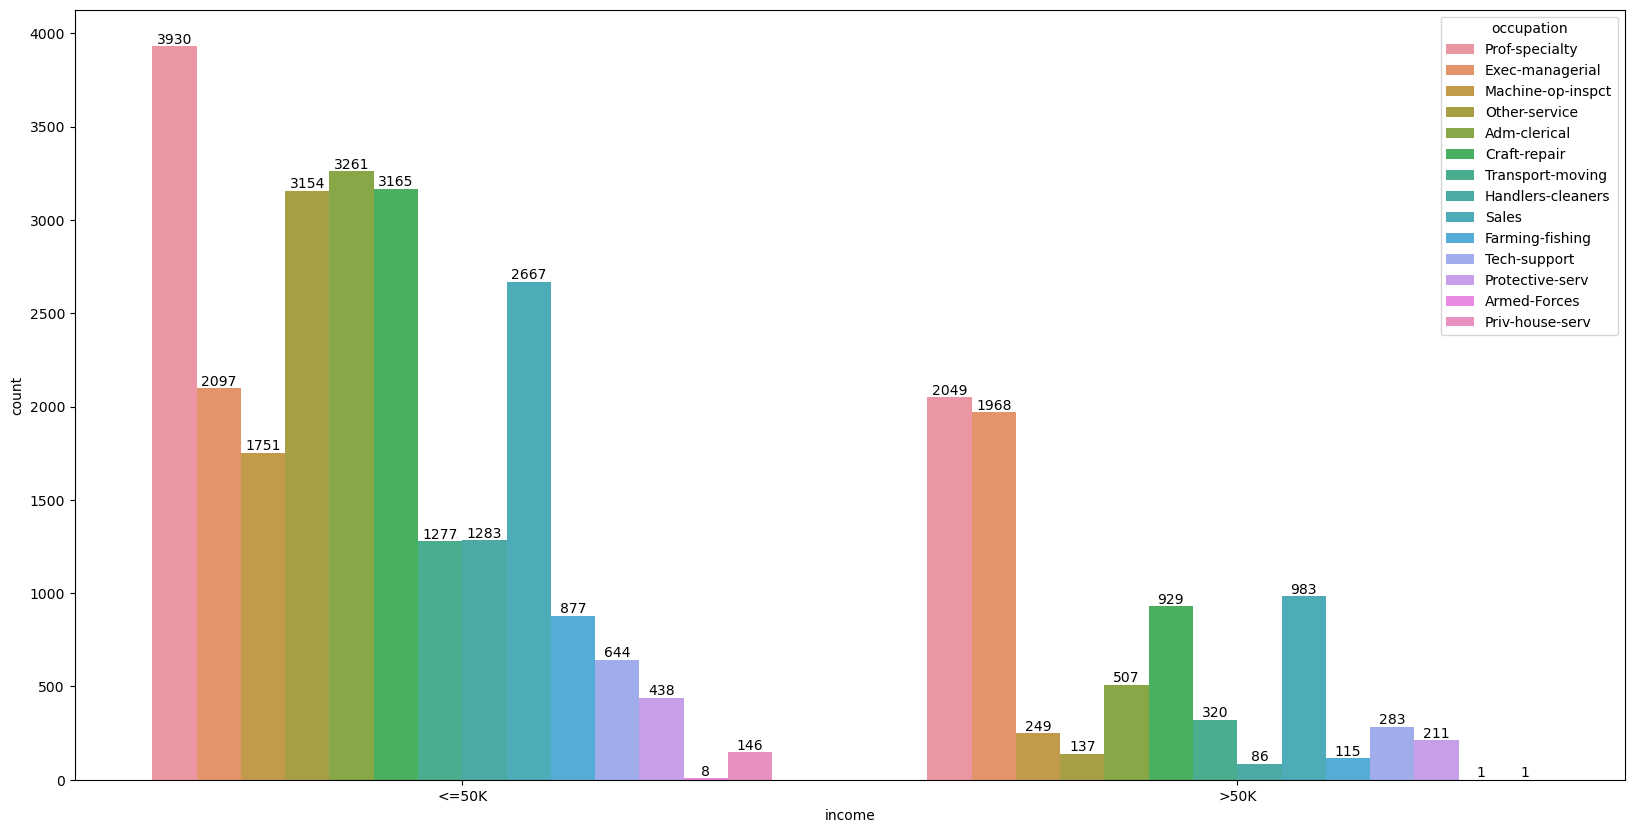

In [20]:
plt.figure(figsize=(20,10))
ax=sns.countplot(data=df,x='income',hue='occupation')
for bars in ax.containers:
    ax.bar_label(bars)

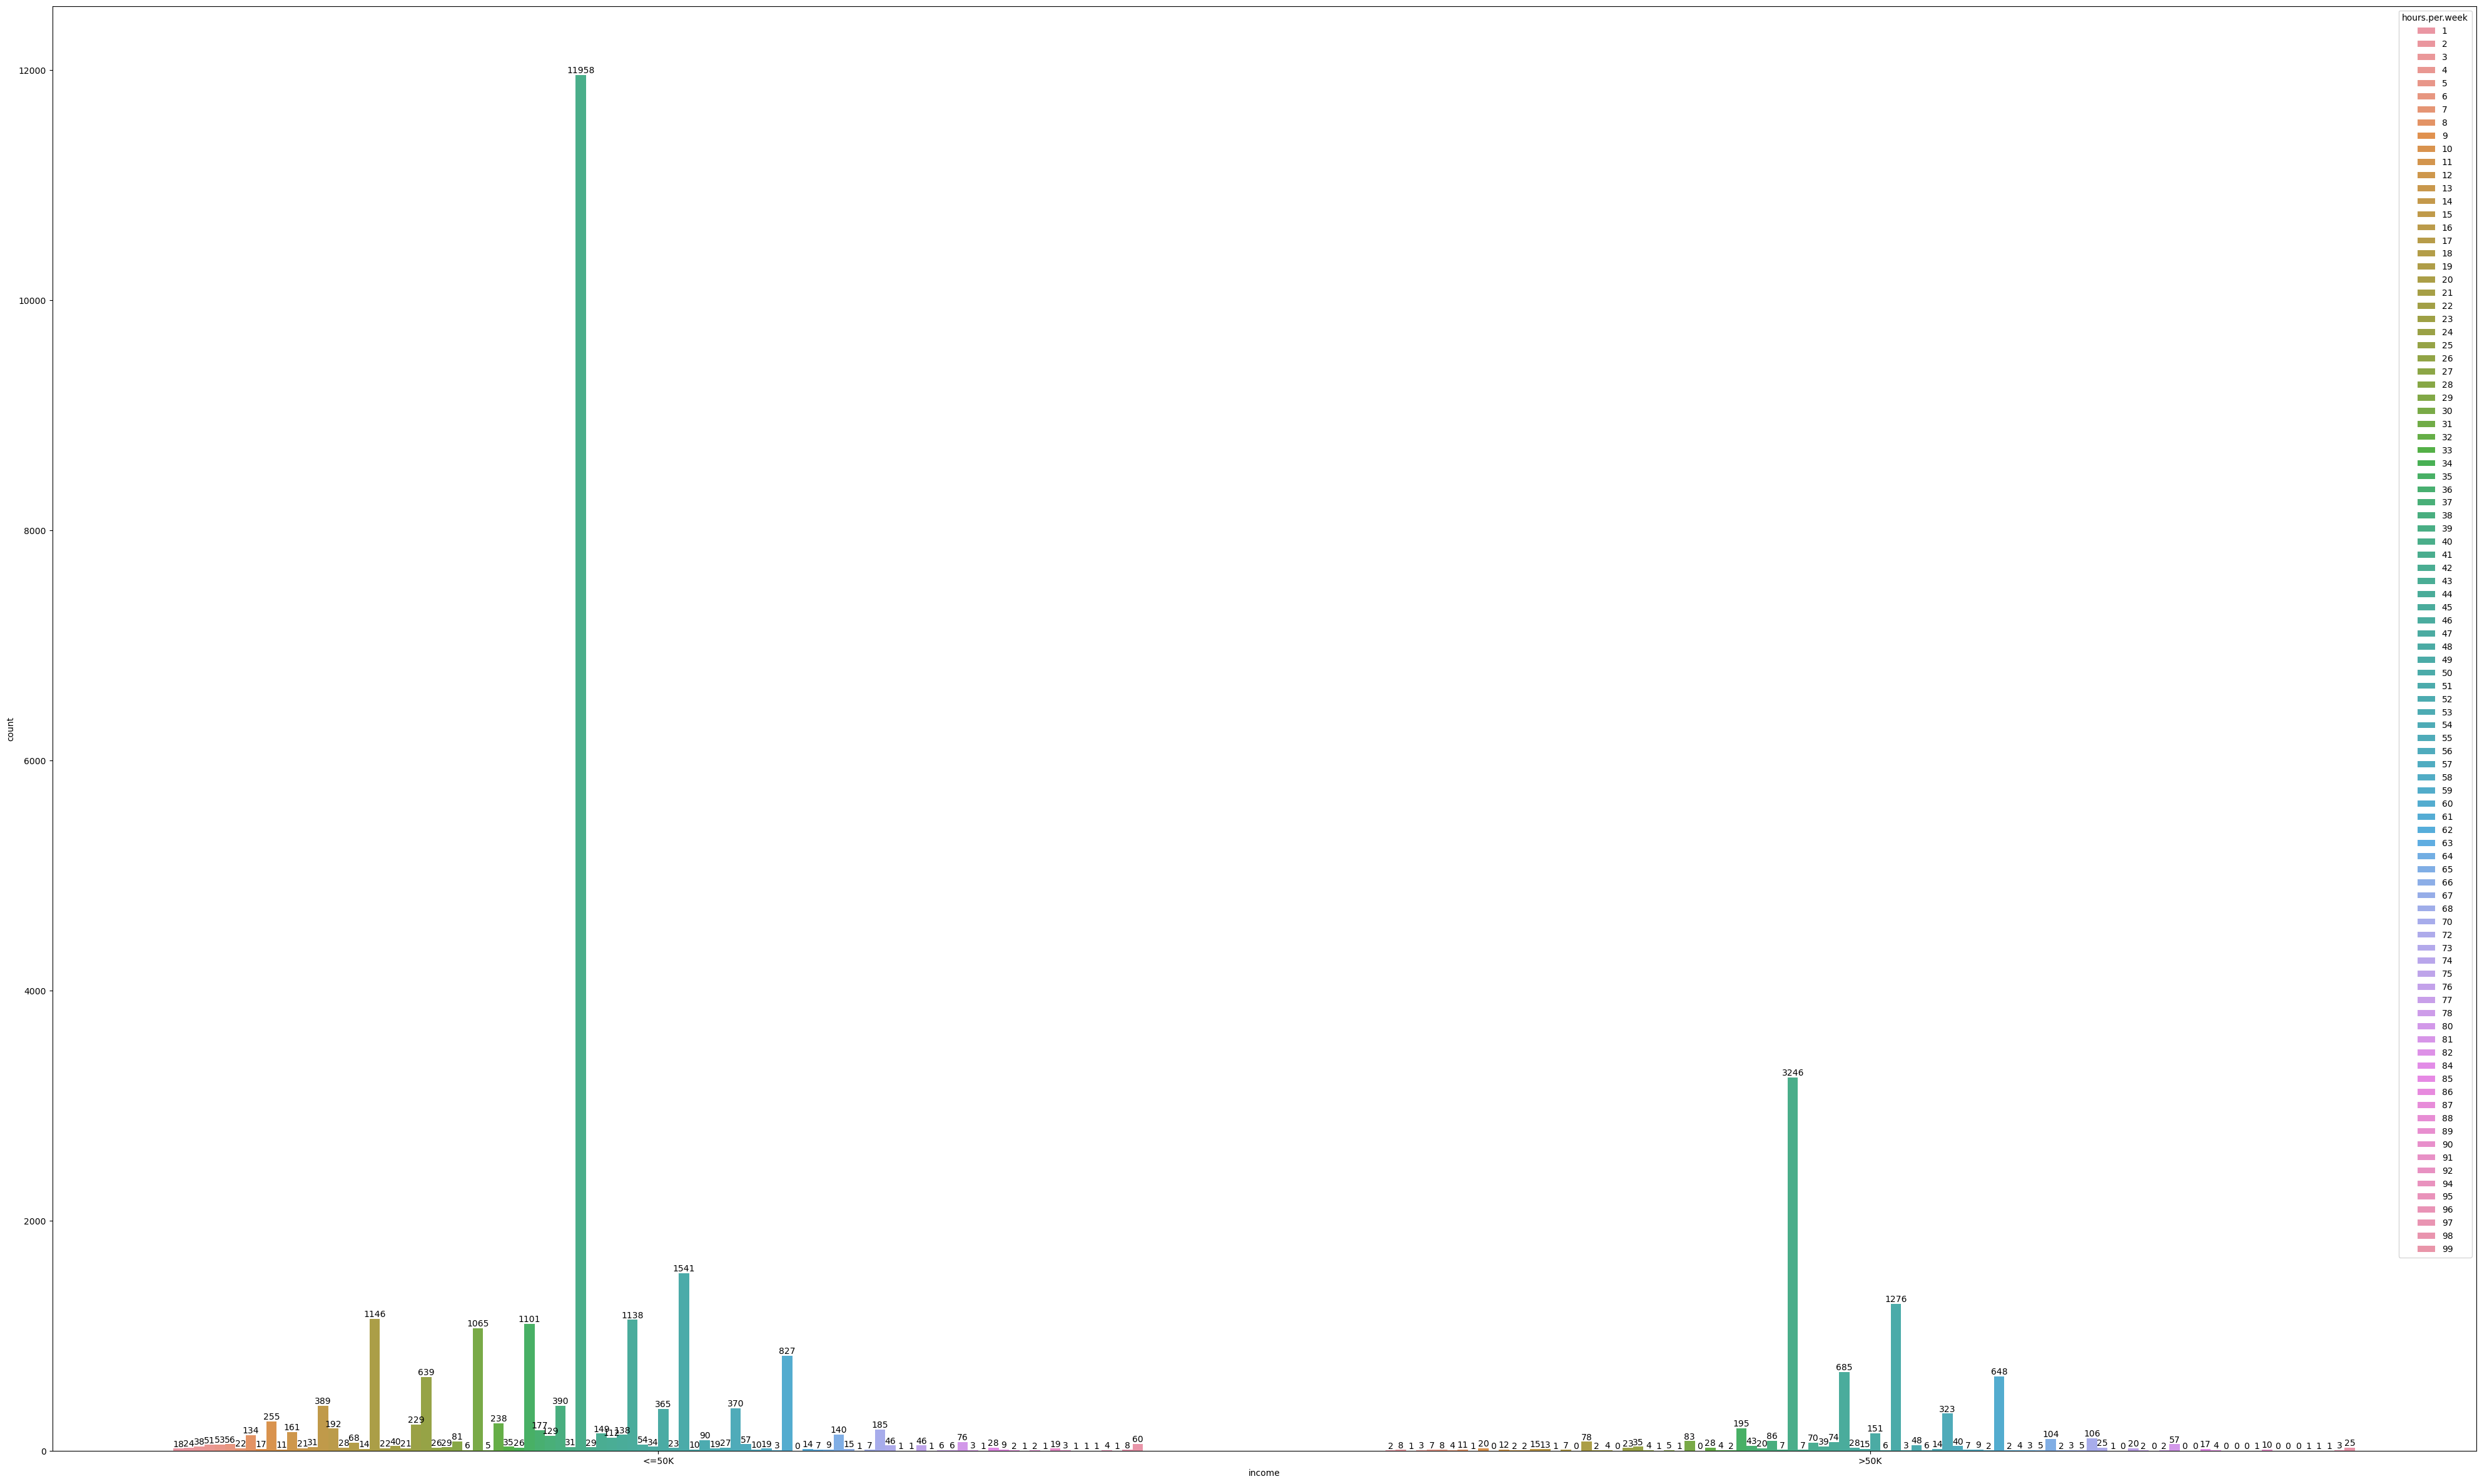

In [21]:
plt.figure(figsize=(50,30))
ax=sns.countplot(data=df,x='income',hue='hours.per.week')
for bars in ax.containers:
    ax.bar_label(bars)

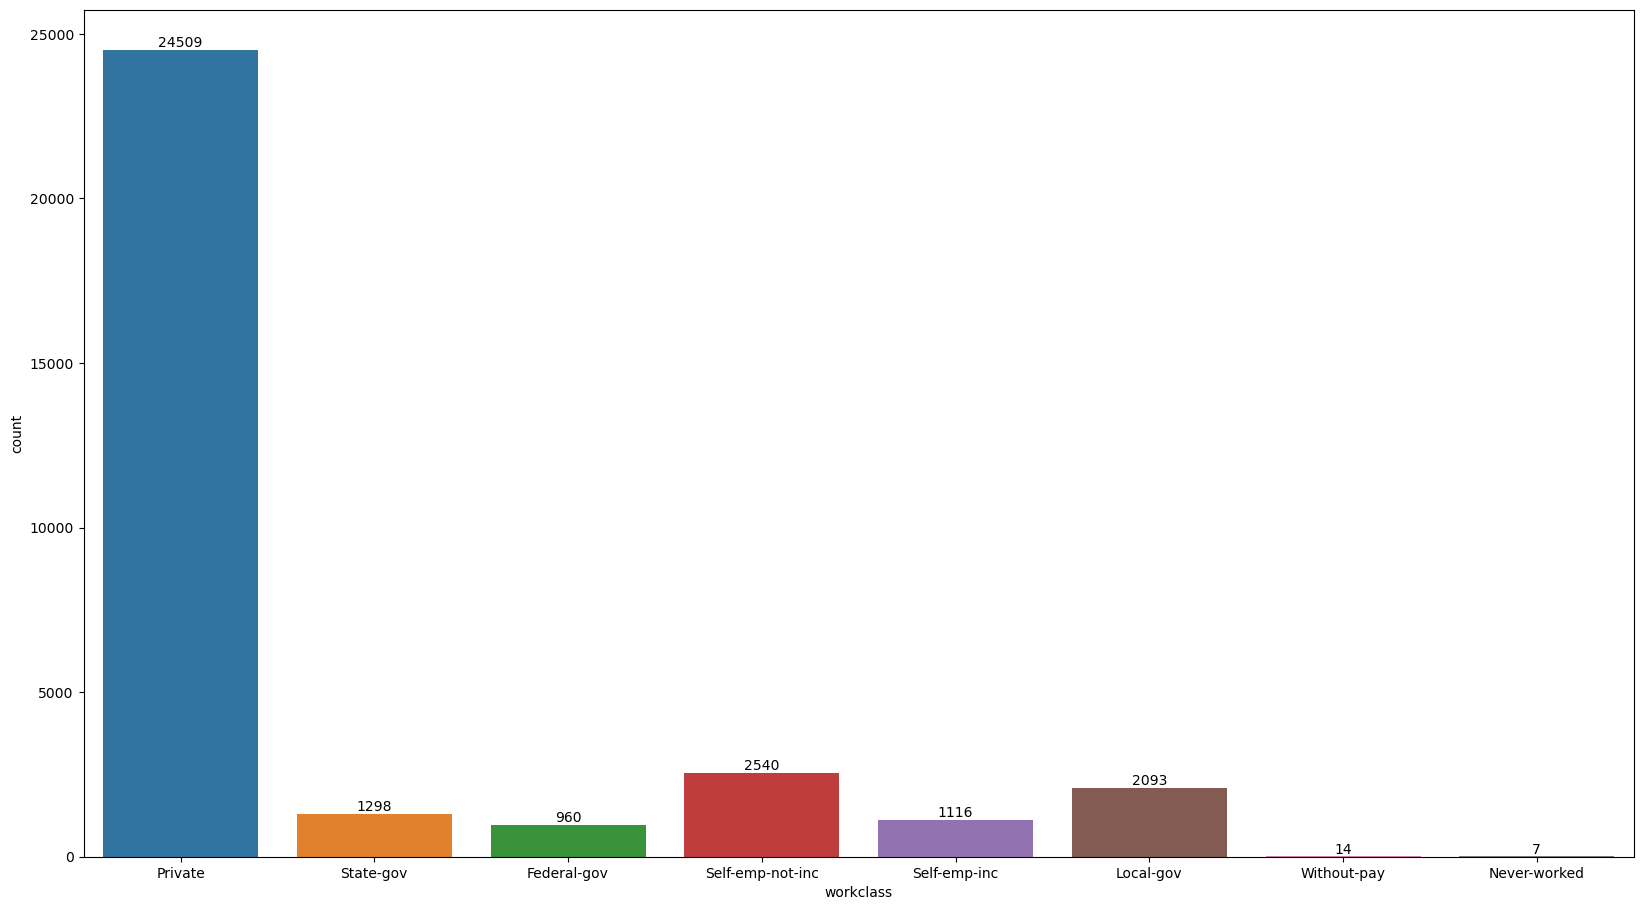

In [22]:
plt.figure(figsize=(20,11))
ax=sns.countplot(data=df,x='workclass')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='income', ylabel='workclass'>

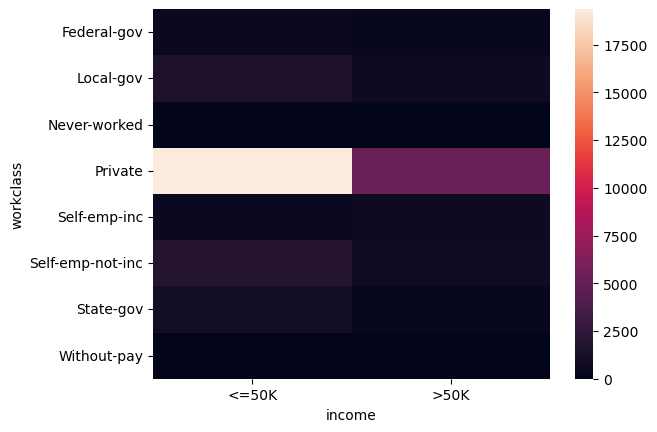

In [23]:
sns.heatmap(pd.crosstab(df['workclass'],df['income']))

<Axes: xlabel='workclass', ylabel='income'>

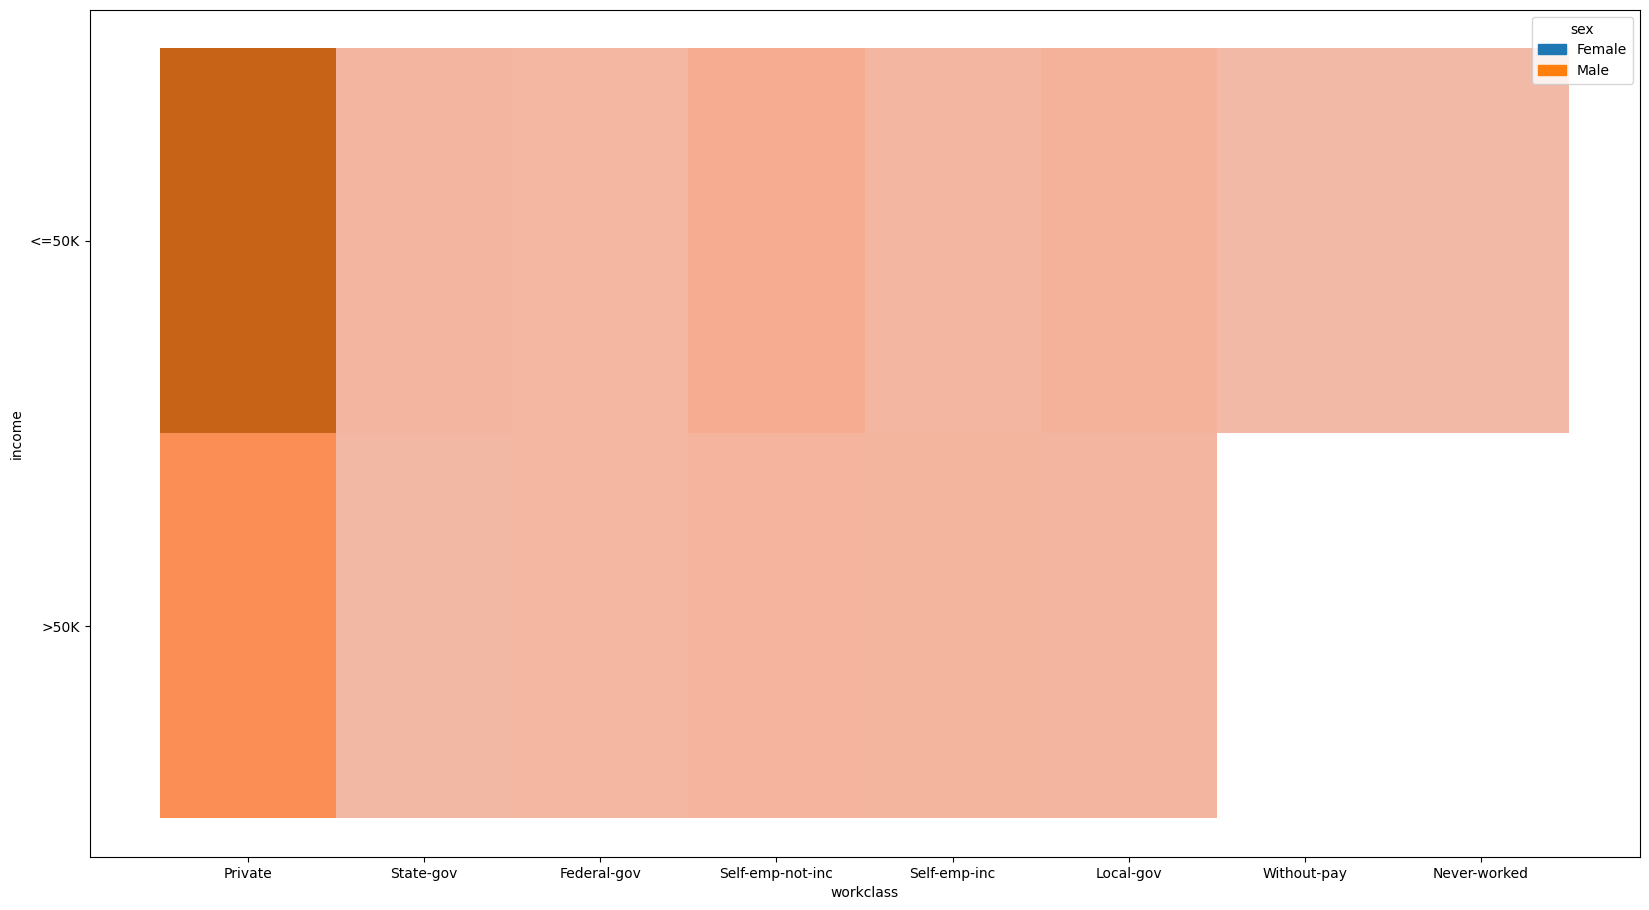

In [24]:
plt.figure(figsize=(20,11))
sns.histplot(data=df,x='workclass',y='income',hue='sex')


In [25]:
df['education.num'].max()

16

<Axes: xlabel='marital.status', ylabel='count'>

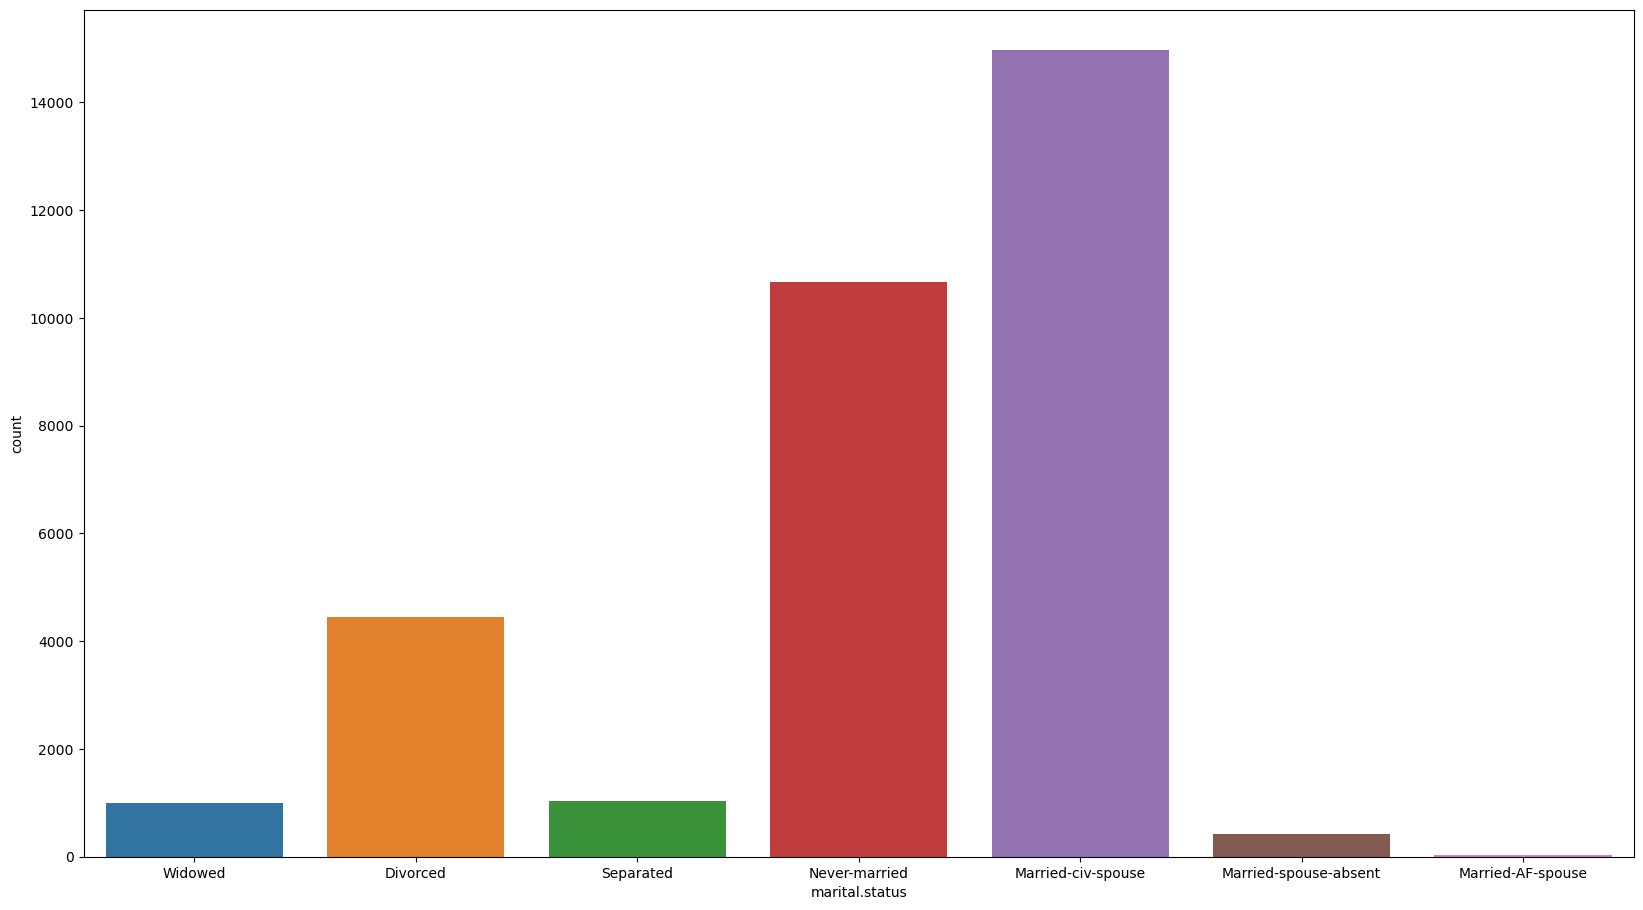

In [26]:
plt.figure(figsize=(20,11))
sns.countplot(data=df,x='marital.status')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 5000x2500 with 0 Axes>

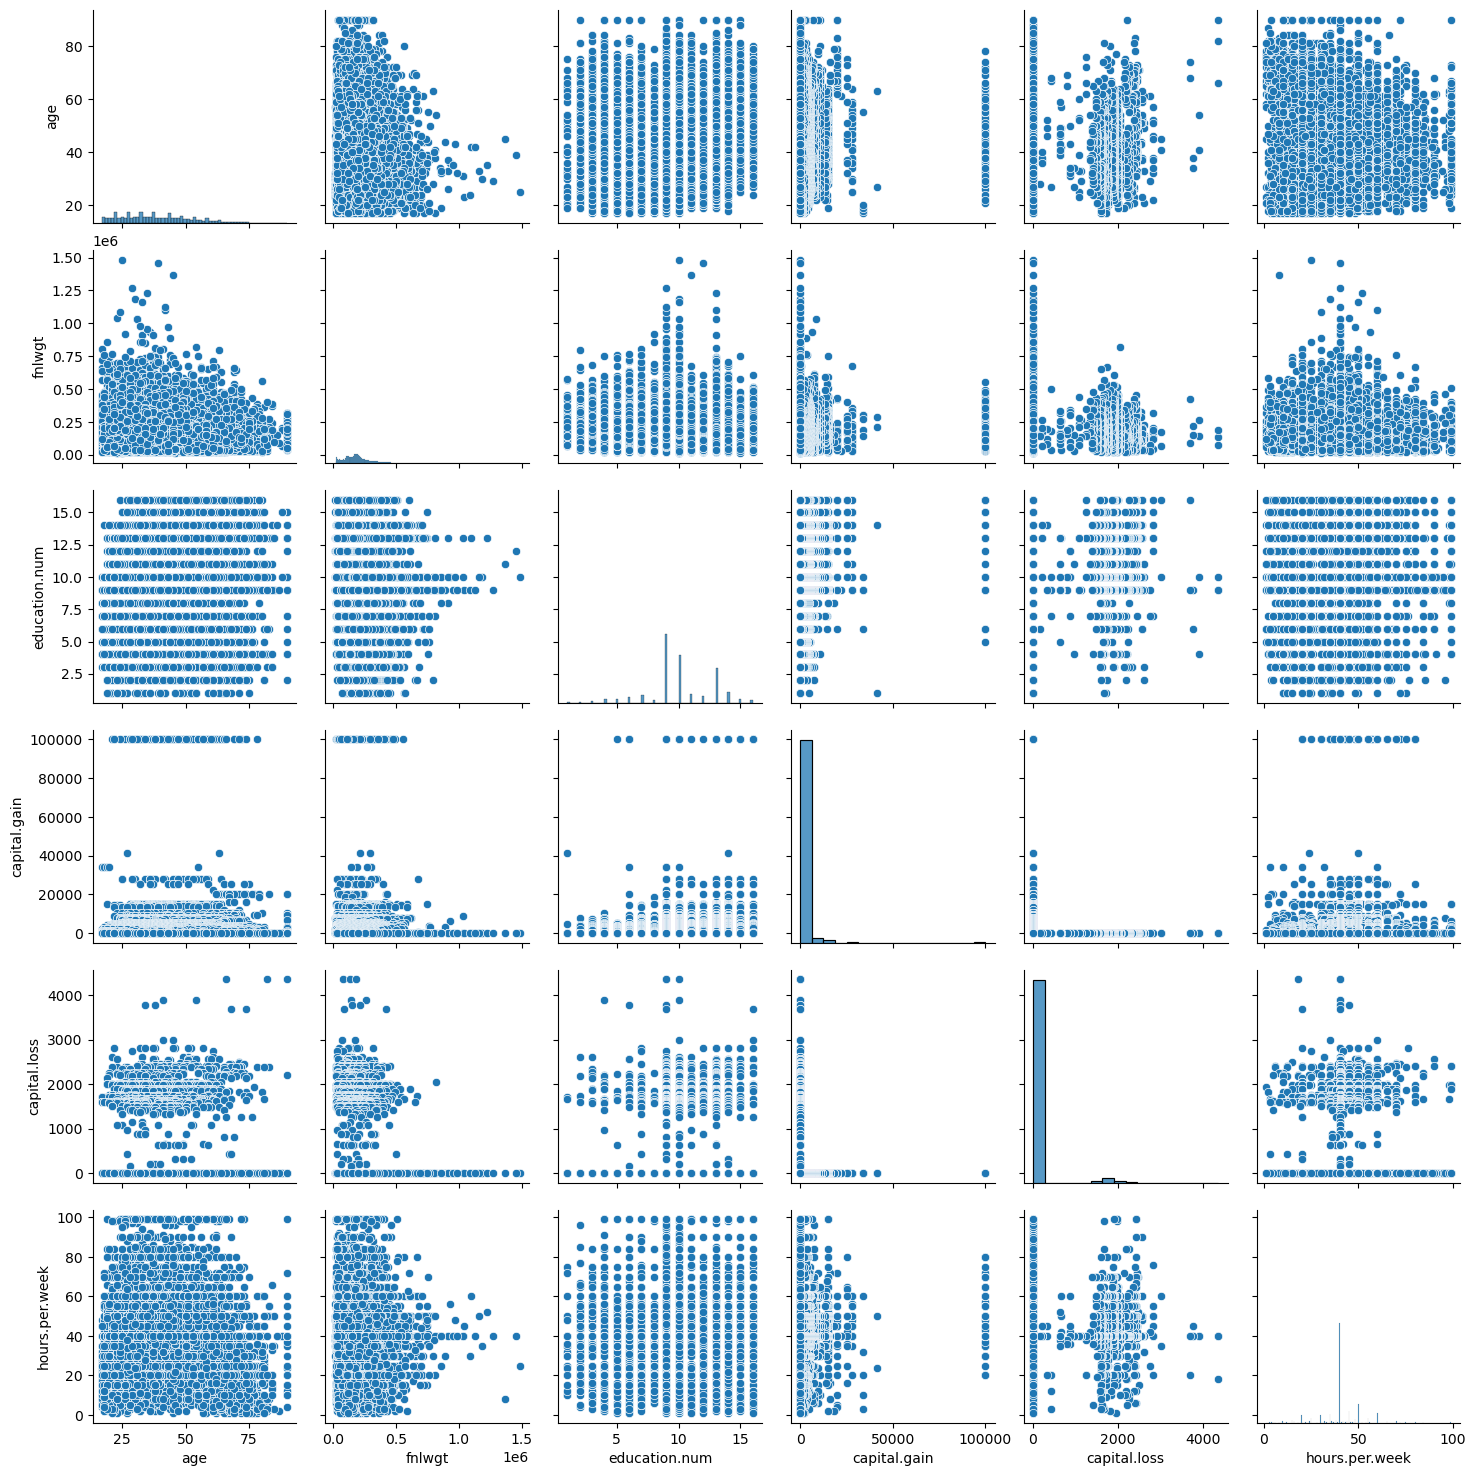

In [27]:
plt.figure(figsize=(50,25))
sns.pairplot(df)

<Axes: xlabel='hours.per.week'>

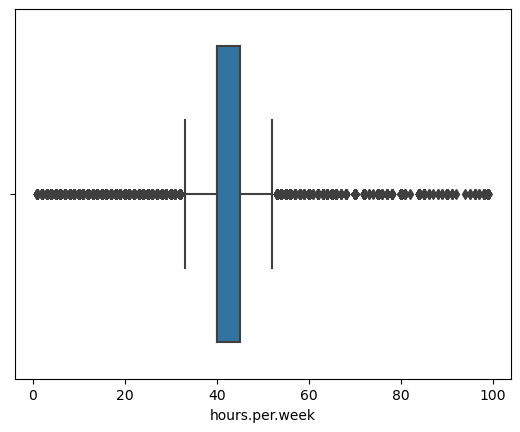

In [28]:
sns.boxplot(data=df,x='hours.per.week')

In [84]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import r2_score

## Data preperation (final cleanup)

In [70]:
# these columns are of no use so removing them.
df = df.drop(['fnlwgt', 'education'], axis=1) 

In [71]:
# Convert income to binary (0 for <=50K, 1 for >50K)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [72]:
# Handling categorical variables
df = pd.get_dummies(df, drop_first=True)

# Linear Regression (Predicting Hours Per Week)

In [73]:
# Spliting data
X = df.drop('hours.per.week', axis=1)
y = df['hours.per.week']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Training model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
# Evaluating
y_pred = lr.predict(X_test)
print("Linear Regression Result:")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")


Linear Regression Results:
R-squared: 0.1828


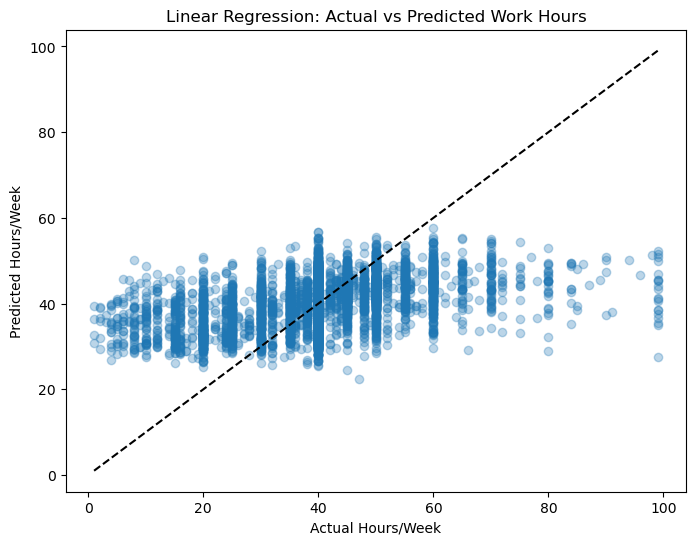

In [78]:
# Ploting actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Hours/Week')
plt.ylabel('Predicted Hours/Week')
plt.title('Linear Regression: Actual vs Predicted Work Hours')
plt.show()

OBSERVATION:

1. Model Performance Overview
The points are somewhat scattered around the diagonal line, indicating moderate prediction accuracy but not perfect alignment.

The clustering suggests the model captures general trends but has room for improvement.

2. Prediction Patterns
Central Clustering: Most points are concentrated around 40 hours/week (standard full-time work), showing the model performs best for typical work hours.

Outliers: Points deviate more at the extremes (e.g., <20 or >60 hours), indicating the model struggles with atypical work hours (part-time or overtime).

3. Systematic Errors
Under-Prediction: Points above the diagonal (actual > predicted) suggest the model underestimates actual hours for some individuals.

Over-Prediction: Points below the diagonal (actual < predicted) show cases where the model overestimates hours.

4. Data Insights
The vertical spread at certain actual values (e.g., 40 hours) implies the model predicts similar values for diverse actual hours, possibly due to limited feature relevance.

The horizontal spread indicates instances where similar actual hours yield varied predictions, highlighting noise or missing features.

5. Practical Implications
Strengths: Reasonable accuracy for common work hours (30–50 hours/week).


• Weaknesses: Poor performance for extreme values, which could be critical for specific analyses (e.g., labor law compliance or overtime studies).

• Suggested Improvements:
Feature Engineering: Add features like occupation type or industry to better capture outliers.

• Model Tuning: Try regularization or non-linear models to handle extreme values.

Error Analysis: Investigate why certain groups (e.g., part-time workers) are mispredicted.

# Logistic Regression (Predicting Income >50K)

In [79]:
# Spliting data
X = df.drop('income', axis=1)
y = df['income']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
# Training model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [91]:
# Evaluating model
train_score = log_reg.score(X_train, y_train)
test_score = log_reg.score(X_test, y_test)

In [92]:
print(f"Training Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

Training Accuracy: 0.85
Test Accuracy: 0.85


In [98]:
# Show some predictions

# sample_data = X_test
# sample_pred = log_reg.predict(sample_data)
# sample_actual = y_test.values


sample_data = X_test[:5]
sample_pred = log_reg.predict(sample_data)
sample_actual = y_test[:5].values

In [99]:
print("\nSample Predictions:")
for i in range(len(sample_data)):
    print(f"Predicted: {sample_pred[i]}, Actual: {sample_actual[i]}")


Sample Predictions:
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0


OBSERVATION:


1. Model Accuracy
Correct Predictions: 4/5 (80% accuracy in this small sample)

Correctly predicted 3 cases of ≤50K (0)

Correctly predicted 1 case of >50K (1)

Incorrect Prediction: 1 case where it predicted ≤50K (0) but actual was >50K (1)

2. Error Analysis
False Negative: The model missed one high-income earner (Predicted: 0, Actual: 1)

No False Positives: All >50K predictions were correct in this sample

3. Pattern Observation
The model shows conservative behavior - it's more likely to predict ≤50K (4/5 predictions were 0)

When it does predict >50K (1), it's accurate (1/1 correct in this sample)

4. Business Implications
Strength: Reliable at identifying clear non-high-earners

Weakness: May miss some potential high-income customers (the false negative)

Opportunity: Could adjust decision threshold if identifying high-income individuals is priority

5. Next Steps Suggested
Check if this 80% accuracy holds across the full test set

Examine features of the misclassified case to understand why it was missed

Consider adjusting classification threshold if recall of high-income individuals is important

Analyze whether the conservative pattern persists in larger samples



This small sample suggests the model is reasonably accurate but may be overly cautious in predicting high incomes. The one error was a missed opportunity (false negative), which could be important for marketing applications where identifying potential high-income customers is valuable.